In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
import json

## Functions to Use

In [2]:
def parseTimestamp(t):
    return pd.to_datetime(arg=t, errors='raise', utc=True).tz_convert('US/Eastern')

In [3]:
def weekly_filter(df):
    today = date.today()
    idx = (today.weekday())
    tzinfo = df['created_at'].iloc[0].tzinfo
    wednesday = datetime.combine(today - timedelta(days = idx-3), time(23,59,59), tzinfo=tzinfo)
    thursday = datetime.combine(today - timedelta(days = idx+4), time(), tzinfo=tzinfo)
    dfFiltered = df[df['created_at'].apply(lambda x: (x>=thursday)&(x<=wednesday))].copy()
    return (dfFiltered, thursday, wednesday)

In [4]:
def clear_answer(thread):
    thread['answers'] = np.nan
    return thread

In [5]:
def get_answers(df):
    dfOrig = df.copy().apply(clear_answer, axis=1)
    to_merge = [dfOrig] 
    for index, row in df.iterrows():
        if isinstance(row['answers'], list): # check to see if the thread has answers
            dfAnswers = pd.json_normalize(row['answers'])
            dfAnswers = add_column(dfAnswers, row)
            dfAnswers["type"] = 'answer'
            to_merge.append(dfAnswers)
    return pd.concat(to_merge, axis=0)

In [6]:
def add_column(dfExpanded, row):
    for column in ['category', 'subcategory', 'private', 'user', 'created_at', 'title']:
        dfExpanded[column] = row[column]
    return dfExpanded

## Load Data

In [7]:
df_threads = pd.read_json("COMPSCI 101L 01L discussion threads.json").drop(columns = ["comments"])

In [8]:
df_threads = get_answers(df_threads).drop(columns = ["answers", "document", "endorsed", "number", "comments"])

In [9]:
df_threads['created_at'] = df_threads['created_at'].apply(parseTimestamp)

In [10]:
df_questions = df_threads[df_threads["type"] == "question"]
dfFilteredQ, thursday, wednesday = weekly_filter(df_questions)
print('There were {} posts from {} to {}'.format(dfFilteredQ.shape[0], thursday, wednesday))

df_answers = df_threads[df_threads["type"] == "answer"]
dfFilteredA, thursday, wednesday = weekly_filter(df_answers)

dfFilteredA = dfFilteredA.reset_index()

There were 69 posts from 2023-10-19 00:00:00-04:00 to 2023-10-26 23:59:59-04:00


In [11]:
pd.set_option('display.max_columns', None)
#dfFilteredQ

In [12]:
#TAs = []
#for f in dfFilteredA["user.name"]:
    #TAs.append(f)
#for TA in set(TAs):
    #print(TA, TAs.count(TA))

## Visualize Data

Text(0.5, 1.0, 'Ed Discussion Posts by Category')

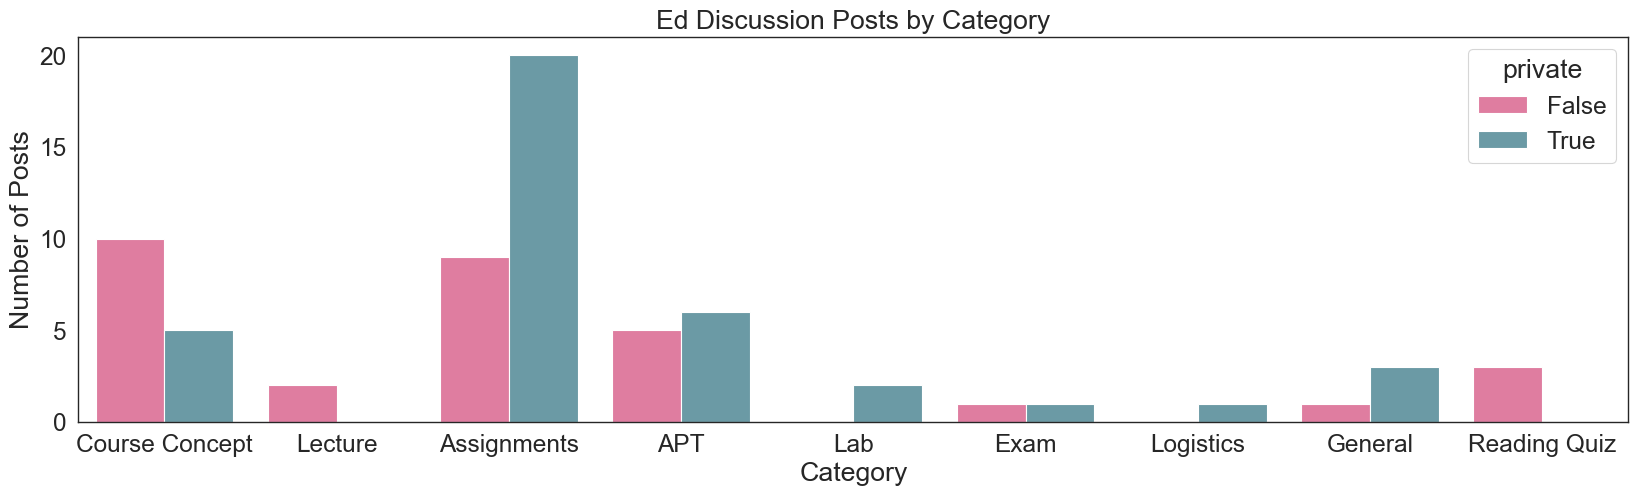

In [13]:
sns.set(rc = {'figure.figsize':(20, 5)})
sns.set_style("white")
sns.set_context("paper", font_scale = 2)
sns.color_palette("husl", 8)
sns.countplot(data = dfFilteredQ, x = "category", hue = "private", palette = {True: "#61A0AF", False: "#F06C9B"})
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.title('Ed Discussion Posts by Category')